In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

In [2]:
df = pd.read_csv('Flight.csv')
df.head()

,Passenger_ID,Flight_ID,Arrived
0,1811,A320,1
1,1812,A320,1
2,1813,B777,1
3,1814,B737,1
4,1815,B737,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Passenger_ID  1000 non-null   int64 
 1   Flight_ID     1000 non-null   object
 2   Arrived       1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [4]:
ans = pd.DataFrame(df['Arrived'].value_counts().reset_index())
ans.rename(columns = {'index' : 'Arrived', 'Arrived' : 'count'}, inplace = True)

In [5]:
ans

,Arrived,count
0,1,902
1,0,98


<AxesSubplot:xlabel='Arrived', ylabel='count'>

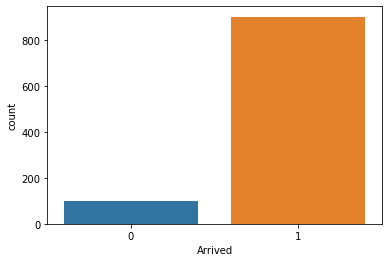

In [6]:
sns.barplot(data = ans, x =  'Arrived', y = 'count')

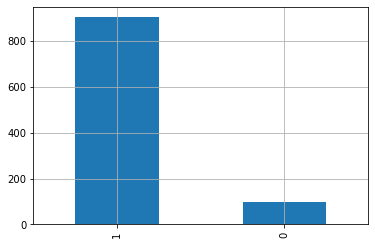

In [7]:
df['Arrived'].value_counts().plot.bar()
plt.grid()
plt.show()

In [8]:
df['Arrived'].value_counts()[1]

902

In [9]:
# probability of persons showsup on flight
showsup_probability = df['Arrived'].value_counts(normalize=True)[1]
print(showsup_probability)

0.902


In [10]:
# probability of persons that not showsup on flight
not_showsup_probability = df['Arrived'].value_counts(normalize=True)[0]
print(not_showsup_probability)

0.098


In [12]:
PENALTY = 10000
def comb(n, r):
  num1 = math.factorial(n)
  num2 = math.factorial(r)
  num3 = math.factorial(n-r)
  return num1/(num2*num3)

In [13]:
def calculate_expected_penalty(ticket_sold):
    
    total_penalty = 0.0
    
    for i in range(1, ticket_sold - 100+1):
        ##pmf for k successes, n trials, p=success probab
        prob = stats.binom.pmf(k=100+i,n=ticket_sold,p=showsup_probability)
        penalty = prob*PENALTY*i
        total_penalty += penalty
    
    return total_penalty

In [14]:
for i in range(100, 150):
    sales = 5000*i
    penalty  = calculate_expected_penalty(i)
    netsales = (sales - penalty)
    print("Total seats:",i, ", Net Sales :",round(netsales))

Total seats: 100 , Net Sales : 500000
Total seats: 101 , Net Sales : 505000
Total seats: 102 , Net Sales : 509996
Total seats: 103 , Net Sales : 514979
Total seats: 104 , Net Sales : 519913
Total seats: 105 , Net Sales : 524725
Total seats: 106 , Net Sales : 529288
Total seats: 107 , Net Sales : 533425
Total seats: 108 , Net Sales : 536929
Total seats: 109 , Net Sales : 539603
Total seats: 110 , Net Sales : 541302
Total seats: 111 , Net Sales : 541959
Total seats: 112 , Net Sales : 541595
Total seats: 113 , Net Sales : 540305
Total seats: 114 , Net Sales : 538233
Total seats: 115 , Net Sales : 535544
Total seats: 116 , Net Sales : 532393
Total seats: 117 , Net Sales : 528919
Total seats: 118 , Net Sales : 525227
Total seats: 119 , Net Sales : 521398
Total seats: 120 , Net Sales : 517484
Total seats: 121 , Net Sales : 513521
Total seats: 122 , Net Sales : 509531
Total seats: 123 , Net Sales : 505526
Total seats: 124 , Net Sales : 501514
Total seats: 125 , Net Sales : 497497
Total seats: